In [107]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report

In [138]:
df = pd.read_csv('DS3_C3_S1_Yelp_Data_Practice.csv')

In [3]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
review = df.text

In [5]:
review

0       My wife took me here on my birthday for breakf...
1       I have no idea why some people give bad review...
2       love the gyro plate. Rice is so good and I als...
3       Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4       General Manager Scott Petello is a good egg!!!...
                              ...                        
9995    First visit...Had lunch here today - used my G...
9996    Should be called house of deliciousness!\n\nI ...
9997    I recently visited Olive and Ivy for business ...
9998    My nephew just moved to Scottsdale recently so...
9999    4-5 locations.. all 4.5 star average.. I think...
Name: text, Length: 10000, dtype: object

In [8]:
review = review.apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [56]:
review_cleaned = review.apply(lambda word: ' '.join([word for word in word.split() if word.lower() not in stopwords.words('English')])) 

In [58]:
final_df= pd.concat([review_cleaned,df.stars],axis=1)

In [59]:
final_df.head()

,text,stars
0,wife took birthday breakfast excellent weather...,5
1,idea people give bad reviews place goes show p...,5
2,love gyro plate Rice good also dig candy selec...,4
3,Rosie Dakota LOVE Chaparral Dog Park convenien...,5
4,General Manager Scott Petello good egg go deta...,5


In [79]:
TFIDF = TfidfVectorizer()
TFIDFobject = TFIDF.fit_transform(final_df.text) 
TFID1= TFIDFobject.toarray()
TFID1 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [80]:
docs_train, docs_test, y_train, y_test = train_test_split(TFID1 , final_df.stars, test_size = 0.20, random_state = 12)

In [89]:
clf = MultinomialNB()
clf.fit(docs_train, y_train)

MultinomialNB()

In [91]:
y_pred = clf.predict(docs_train)

In [92]:
y_pred

array([4, 5, 4, ..., 4, 4, 4], dtype=int64)

In [93]:
y_pred_test = clf.predict(docs_test)

In [94]:
y_pred_test

array([4, 5, 4, ..., 4, 5, 4], dtype=int64)

In [97]:
print('accuracy test:', accuracy_score(y_test,y_pred_test ))
print('accuracy train:', accuracy_score(y_train,y_pred))

accuracy test: 0.4215
accuracy train: 0.560125


In [99]:
confusion_matrix(y_test,y_pred_test)

array([[  0,   0,   0, 114,  28],
       [  0,   0,   0, 172,   6],
       [  0,   0,   0, 306,  14],
       [  0,   0,   0, 615,  84],
       [  0,   0,   0, 433, 228]], dtype=int64)

In [100]:
confusion_matrix(y_train,y_pred)

array([[   1,    0,    0,  501,  105],
       [   0,    0,    0,  705,   44],
       [   0,    0,    1, 1097,   43],
       [   0,    0,    0, 2785,   42],
       [   0,    0,    0,  982, 1694]], dtype=int64)

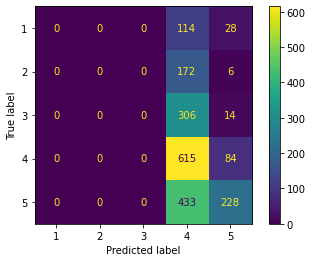

In [105]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)

disp.plot()
plt.show()

In [110]:
import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       142
           2       0.00      0.00      0.00       178
           3       0.00      0.00      0.00       320
           4       0.38      0.88      0.53       699
           5       0.63      0.34      0.45       661

    accuracy                           0.42      2000
   macro avg       0.20      0.24      0.19      2000
weighted avg       0.34      0.42      0.33      2000



# TASK2

In [111]:
from sklearn.pipeline import Pipeline

In [124]:
docs_train, docs_test, y_train, y_test = train_test_split(final_df.text , final_df.stars, test_size = 0.20, random_state = 12)
model =  Pipeline([
    ('vectorizer', TfidfVectorizer(sublinear_tf=True,max_df=0.5,min_df=1,stop_words=stopwords.words('english'),use_idf=True,smooth_idf=True)),
    ('nb', MultinomialNB())
])

In [125]:
model.fit(docs_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.5,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 sublinear_tf=True)),
                ('nb', MultinomialNB())])

In [126]:
y_pred_test = model.predict(docs_test)

In [127]:
y_pred_train = model.predict(docs_train)

In [128]:
print('accuracy test:', accuracy_score(y_test,y_pred_test ))
print('accuracy train:', accuracy_score(y_train,y_pred))

accuracy test: 0.4235
accuracy train: 0.560125


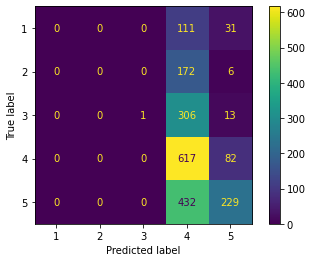

In [129]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)

disp.plot()
plt.show()

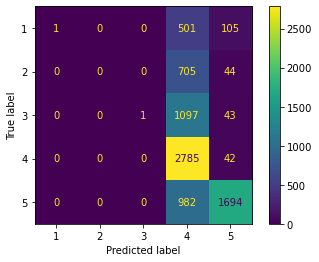

In [130]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_train,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)

disp.plot()
plt.show()

In [131]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       142
           2       0.00      0.00      0.00       178
           3       1.00      0.00      0.01       320
           4       0.38      0.88      0.53       699
           5       0.63      0.35      0.45       661

    accuracy                           0.42      2000
   macro avg       0.40      0.25      0.20      2000
weighted avg       0.50      0.42      0.33      2000



# TASK3

    sublinear_tf=True (To Scale the variables)
    max_df : float or int, default=1.0
        When building the vocabulary ignore terms that have a document
        frequency strictly higher than the given threshold (corpus-specific
        stop words).
        If float in range [0.0, 1.0], the parameter represents a proportion of
        documents, integer absolute counts.
        This parameter is ignored if vocabulary is not None.

    min_df : float or int, default=1
        When building the vocabulary ignore terms that have a document
        frequency strictly lower than the given threshold. This value is also
        called cut-off in the literature.
        If float in range of [0.0, 1.0], the parameter represents a proportion
        of documents, integer absolute counts.
        This parameter is ignored if vocabulary is not None.

    stop_words=stopwords.words('english')
        To remove the stopwords

    use_idf=True

    smooth_idf=True

    After passing all these prameter their is no such imporvement in model. 